## PROBLEM STATEMENT

![](https://cdn-prod.medicalnewstoday.com/content/images/articles/325/325127/raisins-on-a-wooden-spoon.jpg)

Raisins are made by drying different types of grapes under the sun. Raisins are one of the healthiest foods which are a great source of carbohydrates, antioxidants, potassium, fiber and iron, and some studies found out that raisins can lower your risk of heart disease by reducing blood pressure and blood sugar. Turkey is one of the largest producers of grapes and with grape production comes 37% are dried to make raisins. Having a variety of species of grapes can make different types of raisins. Specifically, there are two variety of raisins grown in Turkey Kecimen and Besni. There are many methods used to classify these raisin and most of them are traditional meaning human-made actions or procedures are employed to classify raisins. These traditional process of classifying is meticulous and is very tiresome causing fatigue among workers and causing incosistencies in product classification. So, with the help of new technology and advances in data analysis and processing as well as machine learning, classification models can be used to identify these raisins specifically Kecimen and Besni kind. Classification models also allow for model evaluation to determine wether the classification of raisin is accurate based on corresponding features used to classify them.

## DATASET DESCRIPTION

This [dataset]( https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset) is about two different variety of raisins (Kecimen and Besni) grown in Turkey.  A total of 900 pieces raisin grains were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, minimum, mean, maximum and standard deviation statistical information was calculated for each feature. The 7 features are Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, and Extent, with these 7 features are used to classify the raisin into Kecimen or Besni. The aim of using this dataset is to use 2 different base classifiers and 1 stacked model that will be tuned accordingly to effectively classify raisins into Kecimen or Besni.

## EXPLORATORY DATA ANALYSIS (EDA)

### Read the dataset

In [1]:
## Imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

Pasas_data = pd.read_csv('Raisin_Dataset.csv',)

### Get an overview of the dataset

In [2]:
Pasas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


### Print the first five and last five rows of the dataset

In [3]:
Pasas_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
Pasas_data.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


### Find the summary statistics of the dataset

In [5]:
Pasas_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


### Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages

In [6]:
mask = Pasas_data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Area,0,0.0
MajorAxisLength,0,0.0
MinorAxisLength,0,0.0
Eccentricity,0,0.0
ConvexArea,0,0.0
Extent,0,0.0
Perimeter,0,0.0
Class,0,0.0


### Plot the nullity matrix and nullity correlation heatmap.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


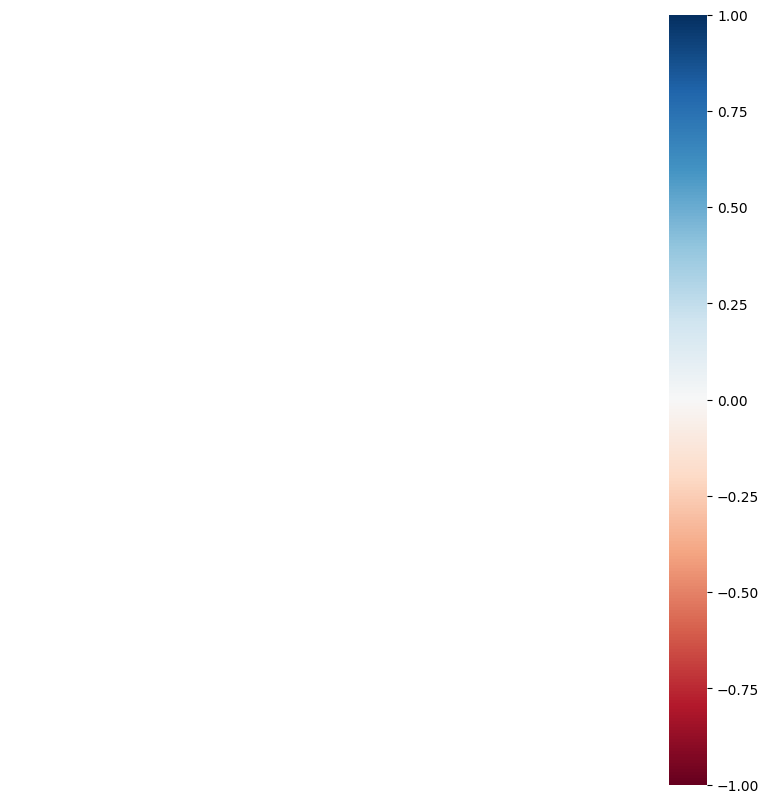

In [7]:
nullable_columns = Pasas_data.columns[mask.any()].tolist()
msno.heatmap(Pasas_data[:], figsize=(10,10))
plt.show()

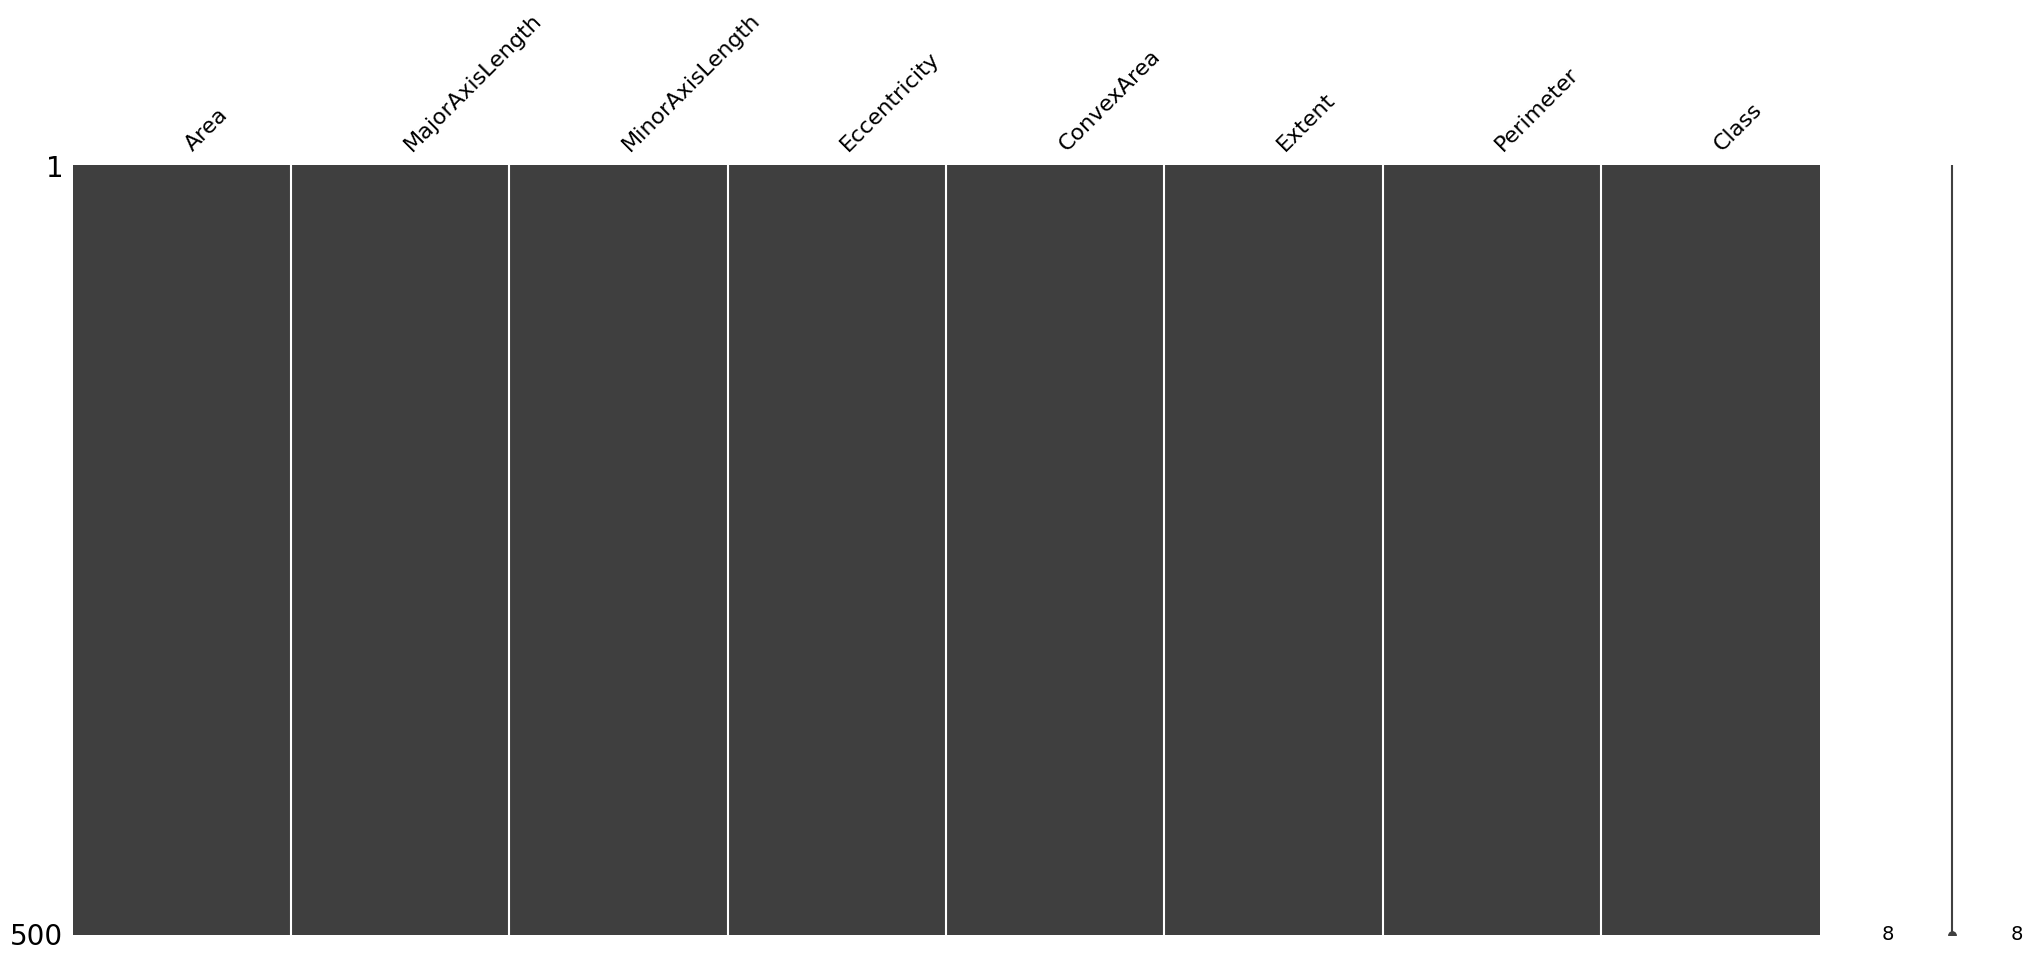

In [8]:
msno.matrix(Pasas_data[:].sample(500))
plt.show()

### Since there are no missing values and I'm keeping all the columns then I will instead change the Class column to 1 and 0 specifically 0 for Kecimen and 1 for Besni.

In [9]:
# Convert columns to numeric
Pasas_data['Class'] = Pasas_data['Class'].str.replace('Kecimen', '0')
Pasas_data['Class'] = Pasas_data['Class'].str.replace('Besni', '1')

cols = Pasas_data.columns
Pasas_data[cols] = Pasas_data[cols].apply(pd.to_numeric, errors='coerce')

Pasas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [10]:
Pasas_data['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

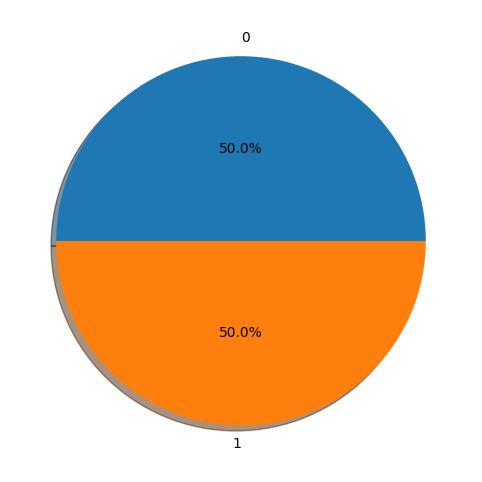

In [11]:
classes = Pasas_data['Class'].value_counts()
ax = plt.subplots(figsize=[10,6])
ax = plt.pie(x=classes, autopct="%.1f%%", labels=classes.index, pctdistance=0.5,shadow=True )

The Class (Kecimen and Besni) is distributed evenly

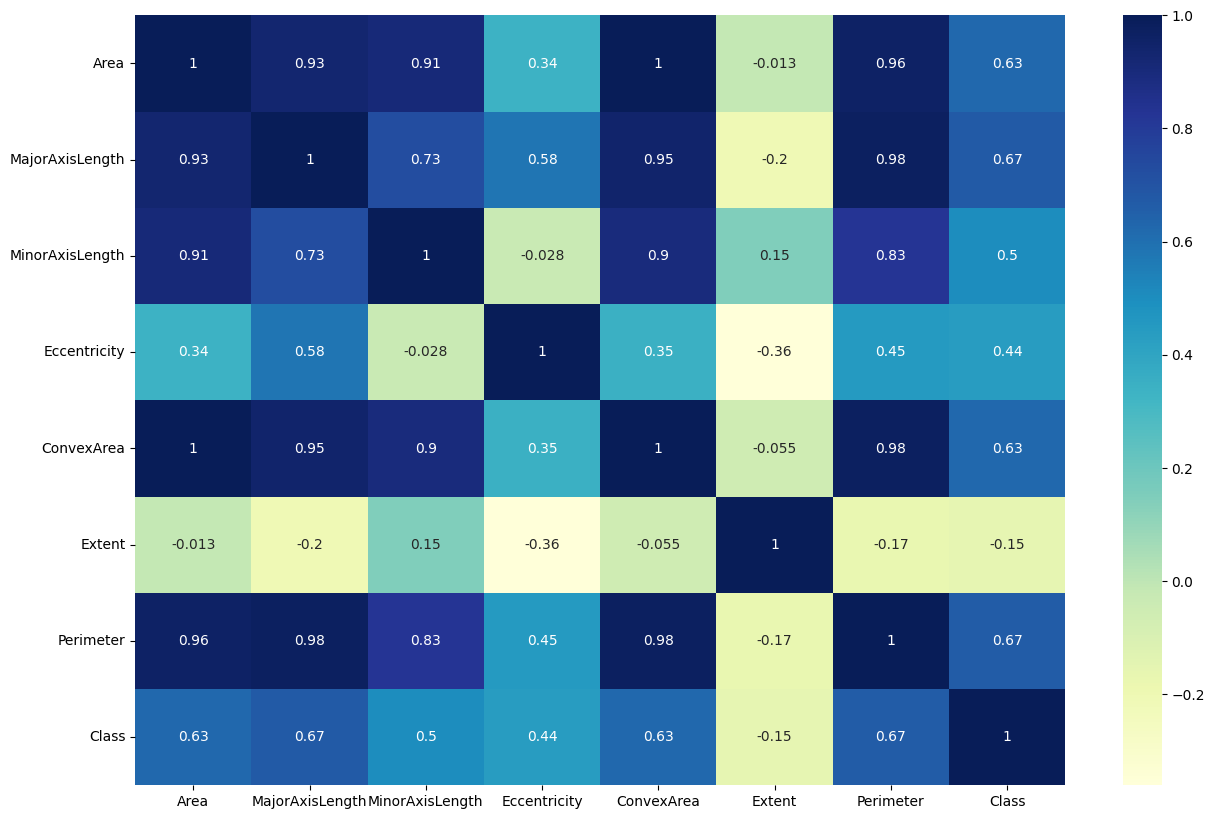

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(Pasas_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

The map shows good correlations with almost of all the feature values present

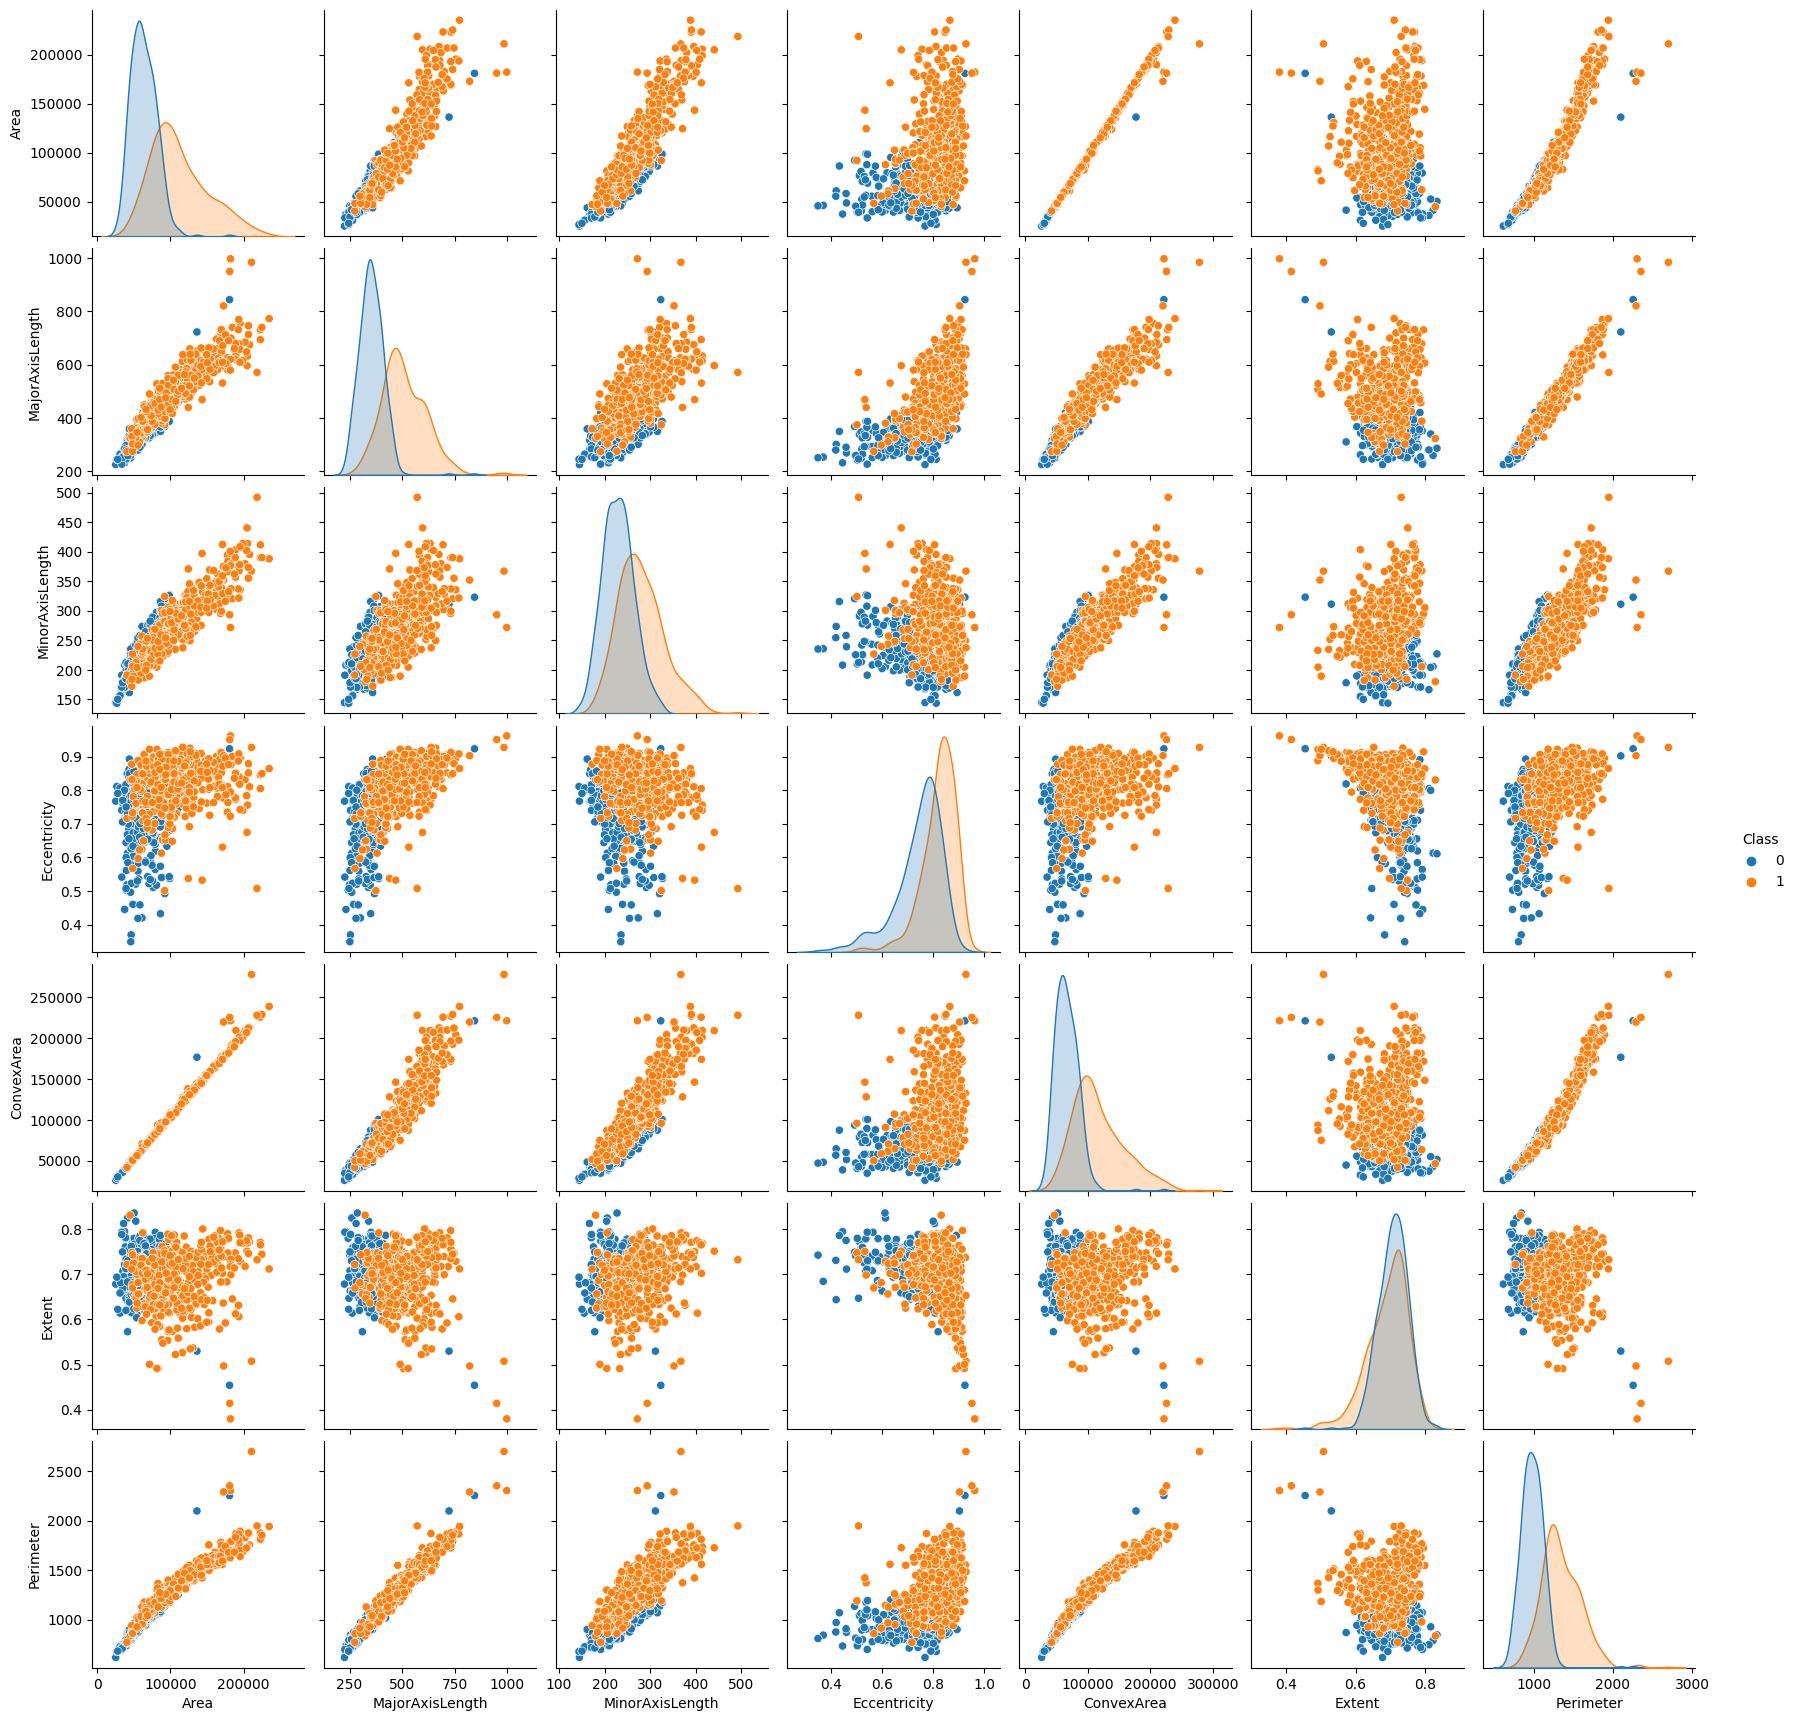

In [13]:
# Visualization of correlation results
sns.pairplot(Pasas_data, hue = "Class")

## AI MODELLING

### Import the required dependencies

In [14]:
# Data Splitting
from sklearn.model_selection import train_test_split

# Base Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve

# Stacking Model
from mlxtend.classifier import StackingCVClassifier

In [15]:
Pasas_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [16]:
Pasas_data.shape

(900, 8)

### Divide the dataset into train and validation DataFrames


In [44]:
X = Pasas_data.drop('Class', axis = True)
y = Pasas_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 11)

## Constructing an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model

### Random Forest Classifier

In [21]:
rf_params = {
    'n_estimators': (100, 250, 400, 550, 700, 850, 1000),
    'max_depth': (100, 250, 400, 550, 700, 850, 1000),
    'criterion': ['entropy'],
    'max_features': ('sqrt', 'log2'),
}

rf = RandomForestClassifier(**rf_params)
rf_cv = RandomizedSearchCV(rf, rf_params, cv = 10)
rf_cv.fit(X_train, y_train)

print("Tuned Decision for Random Forest Best Parameters: {}". format(rf_cv.best_params_))
print("Best Score Generated is: {}".format(rf_cv.best_score_))

Tuned Decision for Random Forest Best Parameters: {'n_estimators': 550, 'max_features': 'log2', 'max_depth': 850, 'criterion': 'entropy'}
Best Score Generated is: 0.8625


In [37]:
rf_stack = RandomForestClassifier(
                    n_estimators=550,
                    max_depth=850,
                    criterion = 'entropy',
                    max_features = 'log2',)
rf_stack.fit(X_train, y_train)
rf_stack_train_prediction = rf_stack.predict(X_train)

In [38]:
randomforest_params = {
    'n_estimators': 550,
    'max_depth': 850,
    'criterion': 'entropy',
    'max_features': 'log2',
}

### XGBoostClassifier

In [36]:
xgb_params = {
    'objective': ['binary:logistic'],
    'learning_rate': [0.01, 0.03, 0.001],
    'n_estimators': [25, 100, 1000],
    'max_depth': [6, 10, 15],
    'gamma': [0, 0.6],
    'subsample': [0.52, 1],
    'colsample_bytree': [0.6, 1],
    'reg_lambda': [1, 2],
    'booster': ['gbtree'],
}

xgb_base = XGBClassifier(**xgb_params)
xgb_cv = RandomizedSearchCV(xgb_base, xgb_params, cv= 10)
xgb_cv.fit(X_train, y_train)

print("Tuned Desicion XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}: ".format(xgb_cv.best_score_))

Tuned Desicion XGB Parameters: {'subsample': 0.52, 'reg_lambda': 2, 'objective': 'binary:logistic', 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 0.6, 'booster': 'gbtree'}
Best score is 0.8638888888888889: 


In [39]:
xgb_stack = XGBClassifier(objective = 'binary:logistic',
                    learning_rate=0.001,
                    n_estimators=1000,
                    max_depth=6,
                    gamma=0,
                    subsample=0.52,
                    colsample_bytree=0.6,
                    seed=27,
                    reg_lambda=2,
                    booster='gbtree',
                    colsample_bylevel=0.6,
                    colsample_bynode=0.5)
xgb_stack.fit(X_train, y_train)
xgb_stack_train_prediction = xgb_stack.predict(X_train)

In [40]:
xgboost_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.001,
    'n_estimators': 1000,
    'max_depth': 6,
    'gamma': 0,
    'subsample': 0.52,
    'colsample_bytree': 0.6,
    'seed': 27,
    'reg_lambda': 2,
    'booster': 'gbtree',
    'colsample_bylevel': 0.6,
    'colsample_bynode': 0.5,
}

### Calculate the performance using metrics accordingly

### RandomForestClassifier

## Confusion Matrix

The trained models is evaluated on the **test set**. Confusion matrix is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

- True Positives (TP) are the cases in which predicted "Besni" (1), and the actual was also "Besni" (1).
- True Negatives (TN) are the cases in which we predicted "Kecimen" (0), and the actual was also "Kecimen" (0).
- False Positives (FP) are the cases in which we predicted "Besni" (1), but the actual was "Kecimen" (0).
- False Negatives (FN) are the cases in which we predicted "Kecimen" (0), but the actual was "Besni" (1).

#### Precision

Precision reflects the model's ability to accurately identify the positive class. It quantifies the proportion of instances correctly classified as positive, out of all instances predicted as positive. Precision is calculated as the number of true positive predictions (TP) divided by the total number of positive predictions made by the model, which includes both true positives (TP) and false positives (FP).

<br>
<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>
<br>
#### Recall
Recall, gauges the model's effectiveness in capturing all actual positive cases. It quantifies the proportion of actual positive instances that were correctly identified by the model. Recall is calculated as the number of true positive predictions (TP) divided by the total number of actual positive instances, which includes both true positives (TP) and false negatives (FN).

<br>
<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>
<br>

#### F1-Score
The F1 score seeks a balanced measure between Precision and Recall, harmonizing the trade-off between these two important metrics. It is calculated as the harmonic mean of Precision and Recall and is designed to provide a single score that balances the precision of positive predictions and the model's ability to capture all actual positive cases. The F1 score is computed as twice the product of Precision and Recall divided by the sum of Precision and Recall.

<br>
<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>
<br>



--RANDOM FOREST CLASSIFIER RESULTS--
Accuracy:  86.66666666666667
Precision:  87.02261772339637
Recall:  86.87306501547988
F1-Score:  86.66666666666667
Confusion Matrix:
 [[77  8]
 [16 79]]


<Axes: >

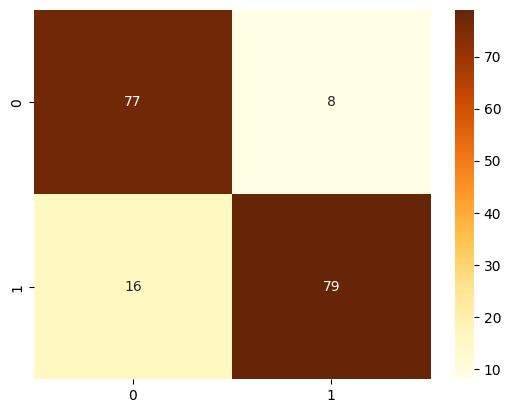

In [79]:
rfc = RandomForestClassifier(**randomforest_params)
rfc.fit(X_train, y_train)
rfc_test_predictions = rfc.predict(X_test)
rfc_accuracyscore = accuracy_score(y_test, rfc_test_predictions)
precisionscore = precision_score(y_test, rfc_test_predictions, average='weighted')
recallscore = recall_score(y_test, rfc_test_predictions, average='macro')
f1score = f1_score(y_test, rfc_test_predictions, average='micro')
cm_rfc = confusion_matrix(y_test, rfc_test_predictions)
print("--RANDOM FOREST CLASSIFIER RESULTS--")
print("Accuracy: ", rfc_accuracyscore * 100)
print("Precision: ", precisionscore * 100)
print("Recall: ", recallscore * 100)
print("F1-Score: ", f1score * 100)
print("Confusion Matrix:\n", cm_rfc)
sns.heatmap(cm_rfc, annot=True, cmap="YlOrBr")

### XGBoostClassifer

--XGBOOST CLASSIFIER RESULTS--
Accuracy:  85.55555555555556
Precision:  86.29914848397024
Recall:  85.55555555555556
F1-Score:  85.55555555555556
Confusion Matrix:
 [[78  7]
 [19 76]]


<Axes: >

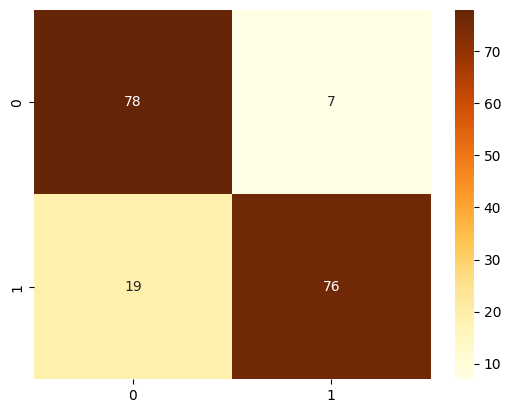

In [86]:
xgbc = XGBClassifier(**xgboost_params)
xgbc.fit(X_train, y_train)
xgbc_test_predictions = xgbc.predict(X_test)
xgbc_accuracyscore = accuracy_score(y_test, xgbc_test_predictions)
precision_score_xgbc = precision_score(y_test, xgbc_test_predictions, average='weighted')
recall_score_xgbc = recall_score(y_test, xgbc_test_predictions, average='weighted')
f1_score_xgbc = f1_score(y_test, xgbc_test_predictions, average='micro')
cm_xgbc = confusion_matrix(y_test, xgbc_test_predictions)
print("--XGBOOST CLASSIFIER RESULTS--")
print("Accuracy: ", xgbc_accuracyscore * 100)
print("Precision: ", precision_score_xgbc * 100)
print("Recall: ", recall_score_xgbc * 100)
print("F1-Score: ", f1_score_xgbc * 100)
print("Confusion Matrix:\n", cm_xgbc)
sns.heatmap(cm_xgbc, annot=True, cmap="YlOrBr")

### Stacked Model

--STACKED MODEL RESULTS--
Accuracy:  86.66666666666667
Precision:  86.66666666666667
Recall:  86.66666666666667
F1-Score:  86.66666666666667
Confusion Matrix:
 [[75 10]
 [14 81]]


<Axes: >

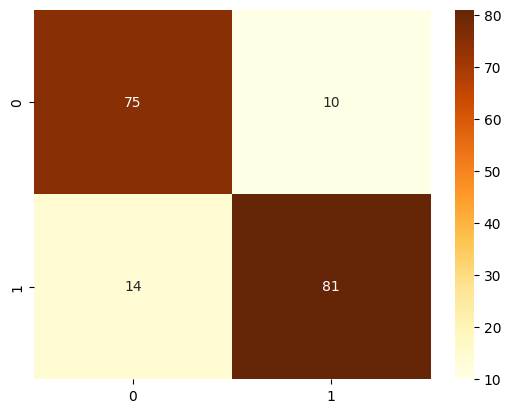

In [90]:
estimator_list = [
    ('RandomForest', rfc),
    ('XGBoost', xgbc),
]

stacked_model = StackingCVClassifier(classifiers=[rf_stack, xgb_stack], meta_classifier=KNeighborsClassifier(n_neighbors=10), random_state=42)
stacked_model.fit(X_train, y_train)
stacked_test_predictions = stacked_model.predict(X_test)
stacked_model_accuracyscore = accuracy_score(y_test, stacked_test_predictions)
precision_score_stacked = precision_score(y_test, stacked_test_predictions, average='micro')
recall_score_stacked = recall_score(y_test, stacked_test_predictions, average='micro')
f1_score_stacked = f1_score(y_test, stacked_test_predictions, average='micro')
cm_stacked = confusion_matrix(y_test, stacked_test_predictions)
print("--STACKED MODEL RESULTS--")
print("Accuracy: ", stacked_model_accuracyscore * 100)
print("Precision: ", precision_score_stacked * 100)
print("Recall: ", recall_score_stacked * 100)
print("F1-Score: ", f1_score_stacked * 100)
print("Confusion Matrix:\n", cm_stacked)
sns.heatmap(cm_stacked, annot=True, cmap="YlOrBr")

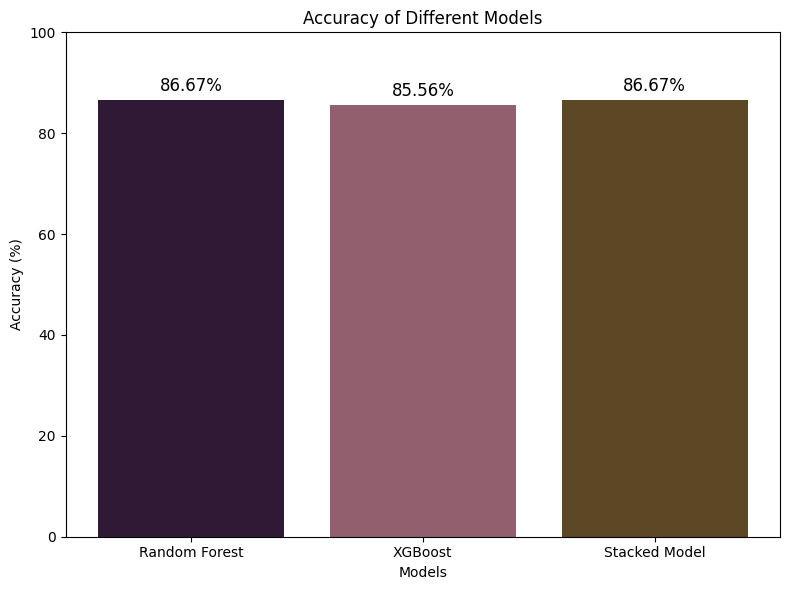

In [92]:
accuracy_scores = [rfc_accuracyscore * 100, xgbc_accuracyscore * 100, stacked_model_accuracyscore * 100]
models = ['Random Forest', 'XGBoost', 'Stacked Model']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['#301934', "#915F6D", "#5C4825"])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)

# Add the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Overall, both the Random Forest Classifier and the Stacked Model performed quite well in terms of accuracy, precision, and recall. The XGBoost Classifier also demonstrated good performance, with only a slightly lower accuracy compared to the other two models.

### Plotting the performane accordingly

In [53]:
y_test.replace([2],[1],inplace=True)

In [54]:
r_probs = [0 for _ in range(len(y_test))]
randomforest_probs = rfc.predict_proba(X_test)
xgboost_probs = xgbc.predict_proba(X_test)
stacked_model_probs = stacked_model.predict_proba(X_test)

In [55]:
randomforest_probs = randomforest_probs[:, 1]
xgboost_probs = xgboost_probs[:, 1]
stacked_model_probs = stacked_model_probs[:, 1]

In [56]:
r_auc = roc_auc_score(y_test, r_probs, multi_class = 'b')
randomforest_auc = roc_auc_score(y_test, randomforest_probs)
xgboost_auc = roc_auc_score(y_test, xgboost_probs)
stacked_model_auc = roc_auc_score(y_test, stacked_model_probs)

In [57]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, randomforest_probs)
xgbc_fpr, xgbc_tpr, _ = roc_curve(y_test, xgboost_probs)
sm_fpr, sm_tpr, _ = roc_curve(y_test, stacked_model_probs)

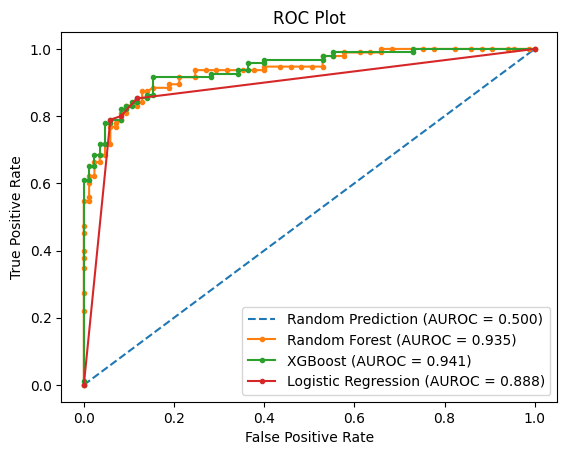

In [58]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % randomforest_auc)
plt.plot(xgbc_fpr, xgbc_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xgboost_auc)
plt.plot(sm_fpr, sm_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % stacked_model_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Test the final values on the test dataset

In [59]:
results = X_test.copy()
results ['Actual'] = y_test
results ['Predicted'] = stacked_model.predict(X_test)
results = results[['Actual', 'Predicted']]
results[:20]

,Actual,Predicted
398,0,1
349,0,1
232,0,1
843,1,1
819,1,1
736,1,1
777,1,1
636,1,1
768,1,1
832,1,1


The table shows actual and predicted values for the binary classification for classifyying raisins into Kecimen (0) and Besni (1). Here's the breakdown of the table:

- Actual: These are the true or actual values of the target variable.
- Predicted: These are the predicted values produced by the stacked classification model.

In the first 3 rows, the model predicted a positive class (1), which corresponded to false positives. However, when considering the overall results, out of 20 predictions, the model made 17 correct predictions, encompassing both true positives and true negatives, while making 3 incorrect predictions, which consisted of false positives.

### Export the Final Model using PICKLE Library

In [ ]:
import pickle
filename = 'Raisin_SEM.pkl'
pickle.dump(stacked_model,open(filename,'wb'))